# Imports and Data Load

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [2]:
# Printing Errors
def errors(model,error_func,X_tr,X_te,y_tr,y_te,squared=False):
    train_error = error_func(y_tr,model.predict(np.array(X_tr)))
    test_error = error_func(y_te,model.predict(np.array(X_te)))
    if squared:
        train_error = train_error**.5
        test_error = test_error**.5
    print("Train Error:",round(train_error))
    print("Test Error:",round(test_error))

In [3]:
tf_df = pickle.load(open(r"Data\tf_df.pickle","rb"))

# Base Model

## Train Test Validation Split
- Using 80% of the data to train

In [4]:
X_tf = np.array(tf_df.drop('views',axis=1))
y_tf = tf_df['views']
X_train, X_test, y_train, y_test = train_test_split(X_tf,y_tf,test_size=150,random_state=4521)
X_train_f,X_val,y_train_f,y_val = train_test_split(X_train,y_train,test_size=100,random_state=4521)

## Modeling

### Loss on RMSE

In [5]:
# Building Model
model_mse = models.Sequential()
model_mse.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mse.add(layers.Dense(units=50,activation='relu'))
model_mse.add(layers.Dropout(rate=0.3))
model_mse.add(layers.Dense(units=50,activation='relu'))
model_mse.add(layers.Dropout(rate=0.3))
model_mse.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mse.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [6]:
# Callbacks to save best model and weights
mse_callback = ModelCheckpoint(r'Data/model_mse.h5',monitor='val_mse',mode='min',save_best_only=True)

In [7]:
# Training Step
history_mse = model_mse.fit(X_train_f, y_train_f, batch_size=5,epochs=50,validation_data=(X_val,y_val),
                            callbacks=[mse_callback])

Epoch 1/50
201/201 [==============================] - 0s 2ms/step - loss: 22867703808.0000 - mse: 22867703808.0000 - val_loss: 22609612800.0000 - val_mse: 22609612800.0000
Epoch 2/50
201/201 [==============================] - 0s 1ms/step - loss: 20874024960.0000 - mse: 20874024960.0000 - val_loss: 17416962048.0000 - val_mse: 17416962048.0000
Epoch 3/50
201/201 [==============================] - 0s 1ms/step - loss: 13806081024.0000 - mse: 13806081024.0000 - val_loss: 11038659584.0000 - val_mse: 11038659584.0000
Epoch 4/50
201/201 [==============================] - 0s 1ms/step - loss: 11134323712.0000 - mse: 11134323712.0000 - val_loss: 10367960064.0000 - val_mse: 10367960064.0000
Epoch 5/50
201/201 [==============================] - 0s 1ms/step - loss: 10727207936.0000 - mse: 10727207936.0000 - val_loss: 10233564160.0000 - val_mse: 10233564160.0000
Epoch 6/50
201/201 [==============================] - 0s 2ms/step - loss: 10579743744.0000 - mse: 10579742720.0000 - val_loss: 10139537408.0

Epoch 49/50
201/201 [==============================] - 0s 806us/step - loss: 3635256320.0000 - mse: 3635256320.0000 - val_loss: 14091714560.0000 - val_mse: 14091714560.0000
Epoch 50/50
201/201 [==============================] - 0s 789us/step - loss: 3879103232.0000 - mse: 3879103232.0000 - val_loss: 14216223744.0000 - val_mse: 14216223744.0000


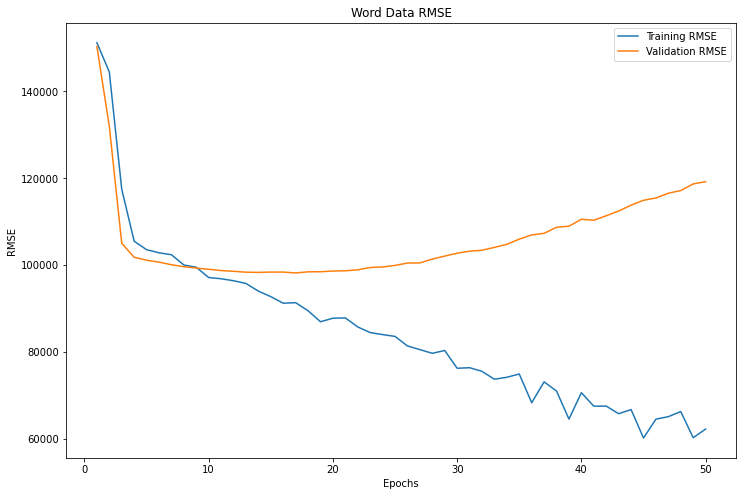

In [8]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mse.history

rmse_values = np.sqrt(model_dict['mse']) 
val_rmse_values = np.sqrt(model_dict['val_mse'])

epochs = range(1, len(rmse_values) + 1)
ax.plot(epochs, rmse_values, label='Training RMSE')
ax.plot(epochs, val_rmse_values, label='Validation RMSE')
plt.legend()
plt.title('Word Data RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

#### Best Results

In [9]:
best_mse = load_model(r'Data/model_mse.h5')
errors(best_mse,mean_squared_error,X_train_f, X_test,y_train_f,y_test,squared=True)

Train Error: 87727
Test Error: 79967


### Loss on MAE

In [10]:
# Building Model
model_mae = models.Sequential()
model_mae.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mae.add(layers.Dense(units=50,activation='relu'))
model_mae.add(layers.Dropout(rate=0.3))
model_mae.add(layers.Dense(units=50,activation='relu'))
model_mae.add(layers.Dropout(rate=0.3))
model_mae.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mae.compile(optimizer='adam',
             loss='mae',
             metrics=['mae'])

In [11]:
# Callbacks to save best model and weights
mae_callback = ModelCheckpoint(r'Data/model_mae.h5',monitor='val_mae',mode='min',save_best_only=True)

In [12]:
# Training Step
history_mae = model_mae.fit(X_train_f, y_train_f, batch_size=5,epochs=50,validation_data=(X_val,y_val),
                            callbacks=[mae_callback])

Epoch 1/50
201/201 [==============================] - 0s 2ms/step - loss: 107079.3516 - mae: 107079.3516 - val_loss: 105387.8672 - val_mae: 105387.8672
Epoch 2/50
201/201 [==============================] - 0s 2ms/step - loss: 89680.3047 - mae: 89680.3047 - val_loss: 61714.0938 - val_mae: 61714.0938
Epoch 3/50
201/201 [==============================] - 0s 1ms/step - loss: 56165.0352 - mae: 56165.0352 - val_loss: 51698.0156 - val_mae: 51698.0156
Epoch 4/50
201/201 [==============================] - 0s 1ms/step - loss: 53102.6172 - mae: 53102.6172 - val_loss: 50612.0508 - val_mae: 50612.0508
Epoch 5/50
201/201 [==============================] - 0s 1ms/step - loss: 50137.9648 - mae: 50137.9648 - val_loss: 49555.0000 - val_mae: 49555.0000
Epoch 6/50
201/201 [==============================] - 0s 1ms/step - loss: 49022.3398 - mae: 49022.3398 - val_loss: 48466.3242 - val_mae: 48466.3242
Epoch 7/50
201/201 [==============================] - 0s 1ms/step - loss: 47881.0977 - mae: 47881.0977 - val

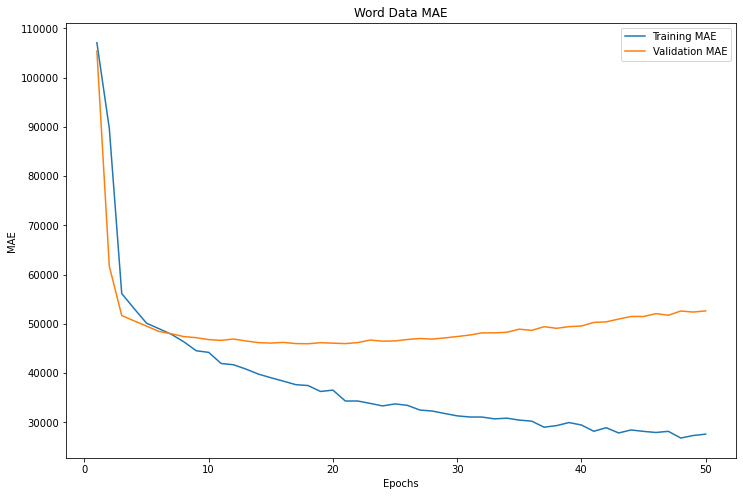

In [13]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mae.history

mae_values = model_dict['mae']
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.legend()
plt.title('Word Data MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

#### Best Results

In [14]:
best_mae = load_model(r'Data/model_mae.h5')
errors(best_mae,mean_absolute_error,X_train_f, X_test,y_train_f,y_test,squared=False)

Train Error: 32371
Test Error: 47073


# Model After Removing Outliers

## Outlier Removal using IQR along with Train Test Validation Split

In [15]:
round(y_train.describe(),2)

count       1102.00
mean      107397.09
std       106641.20
min         8088.00
25%        54421.00
50%        81922.00
75%       127335.75
max      1783323.00
Name: views, dtype: float64

In [5]:
iqr_df = pickle.load(open(r"Data\tf_df.pickle","rb"))

In [6]:
X_iqr = iqr_df.drop('views',axis=1)
y_iqr = iqr_df[['views']]

X_train_iqr,X_test_iqr,y_train_iqr,y_test_iqr = train_test_split(X_iqr,y_iqr,test_size=150,random_state=4521)

In [7]:
# Obtaining Lower and Upper Limits using IQR
q25 = y_train_iqr['views'].describe()['25%']
q75 = y_train_iqr['views'].describe()['75%']
iqr = q75-q25
low_lim = q25-1.5*iqr
upp_lim = q75+1.5*iqr

In [8]:
# Resetting Index to use to help filtering out locations of outliers
X_train_iqr.reset_index(inplace=True)
X_test_iqr.reset_index(inplace=True)
y_train_iqr.reset_index(inplace=True)
y_test_iqr.reset_index(inplace=True)

In [9]:
# Finding Indexes within range
train_keep_in = y_train_iqr['views'].index[(low_lim < y_train_iqr['views']) & (y_train_iqr['views'] < upp_lim)]
test_keep_in = y_test_iqr['views'].index[(low_lim < y_test_iqr['views']) & (y_test_iqr['views'] < upp_lim)]

In [10]:
# New Train and Test data after removing outliers based on train
X_train_iqrf = X_train_iqr.iloc[train_keep_in].drop('index',axis=1)
y_train_iqrf = y_train_iqr.iloc[train_keep_in].drop('index',axis=1)
X_test_iqrf = X_test_iqr.iloc[test_keep_in].drop('index',axis=1)
y_test_iqrf = y_test_iqr.iloc[test_keep_in].drop('index',axis=1)

In [11]:
# Validation Split
X_train_val_iqr,X_val_iqr,y_train_val_iqr,y_val_iqr = train_test_split(X_train_iqrf,
                                                                       y_train_iqrf,
                                                                       test_size=100,random_state=4521)

## Modeling P2

### Loss on RMSE

In [23]:
# Building Model
model_mse_iqr = models.Sequential()
model_mse_iqr.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mse_iqr.add(layers.Dense(units=50,activation='relu'))
model_mse_iqr.add(layers.Dropout(rate=0.3))
model_mse_iqr.add(layers.Dense(units=50,activation='relu'))
model_mse_iqr.add(layers.Dropout(rate=0.3))
model_mse_iqr.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mse_iqr.compile(optimizer='adam',
             loss='mse',
             metrics=['mse'])

In [24]:
# Callbacks to save best model and weights
mse_iqr_callback = ModelCheckpoint(r'Data/model_mse_iqr.h5',monitor='val_mse',mode='min',save_best_only=True)

In [25]:
# Training Step
history_mse_iqr = model_mse_iqr.fit(np.array(X_train_val_iqr), y_train_val_iqr,
                                    batch_size=5,epochs=50,
                                    validation_data=(np.array(X_val_iqr),y_val_iqr),
                                    callbacks=[mse_iqr_callback])

Epoch 1/50
186/186 [==============================] - 0s 1ms/step - loss: 9686715392.0000 - mse: 9686715392.0000 - val_loss: 9297154048.0000 - val_mse: 9297154048.0000
Epoch 2/50
186/186 [==============================] - 0s 1ms/step - loss: 7824121344.0000 - mse: 7824121344.0000 - val_loss: 4757438976.0000 - val_mse: 4757438976.0000
Epoch 3/50
186/186 [==============================] - 0s 1ms/step - loss: 2949289216.0000 - mse: 2949289216.0000 - val_loss: 1572928256.0000 - val_mse: 1572928256.0000
Epoch 4/50
186/186 [==============================] - 0s 1ms/step - loss: 2072537600.0000 - mse: 2072537600.0000 - val_loss: 1422300928.0000 - val_mse: 1422300928.0000
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 1863838336.0000 - mse: 1863838336.0000 - val_loss: 1378543872.0000 - val_mse: 1378543872.0000
Epoch 6/50
186/186 [==============================] - 0s 1ms/step - loss: 1678375296.0000 - mse: 1678375296.0000 - val_loss: 1297799552.0000 - val_mse: 12977994

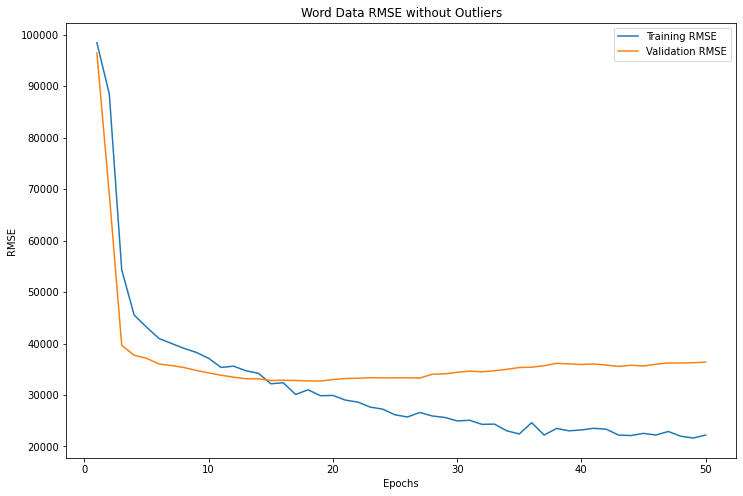

In [26]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mse_iqr.history

rmse_values = np.sqrt(model_dict['mse']) 
val_rmse_values = np.sqrt(model_dict['val_mse'])

epochs = range(1, len(rmse_values) + 1)
ax.plot(epochs, rmse_values, label='Training RMSE')
ax.plot(epochs, val_rmse_values, label='Validation RMSE')
plt.legend()
plt.title('Word Data RMSE without Outliers')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

#### Best Results

In [27]:
best_mse_iqr = load_model(r'Data/model_mse_iqr.h5')
errors(best_mse_iqr,mean_squared_error,X_train_val_iqr,X_test_iqrf,
       y_train_val_iqr,y_test_iqrf,squared=True)

Train Error: 24701
Test Error: 38396


### Loss on MAE

In [28]:
# Building Model
model_mae_iqr = models.Sequential()
model_mae_iqr.add(layers.Dense(units=100,activation='relu',input_shape=(1813,)))
model_mae_iqr.add(layers.Dense(units=50,activation='relu'))
model_mae_iqr.add(layers.Dropout(rate=0.3))
model_mae_iqr.add(layers.Dense(units=50,activation='relu'))
model_mae_iqr.add(layers.Dropout(rate=0.3))
model_mae_iqr.add(layers.Dense(units=1,activation='linear'))

# Compilation Step
model_mae_iqr.compile(optimizer='adam',
             loss='mae',
             metrics=['mae'])

In [29]:
# Callbacks to save best model and weights
mae_iqr_callback = ModelCheckpoint(r'Data/model_mae_iqr.h5',monitor='val_mae',mode='min',save_best_only=True)

In [30]:
# Training Step
history_mae_iqr = model_mae_iqr.fit(np.array(X_train_val_iqr), y_train_val_iqr,
                                    batch_size=5,epochs=50,
                                    validation_data=(np.array(X_val_iqr),y_val_iqr),
                                    callbacks=[mae_iqr_callback])

Epoch 1/50
186/186 [==============================] - 0s 1ms/step - loss: 86354.1641 - mae: 86354.1641 - val_loss: 87180.0234 - val_mae: 87180.0234
Epoch 2/50
186/186 [==============================] - 0s 1ms/step - loss: 69863.5156 - mae: 69863.5078 - val_loss: 45461.4531 - val_mae: 45461.4531
Epoch 3/50
186/186 [==============================] - 0s 1ms/step - loss: 37293.0352 - mae: 37293.0352 - val_loss: 31256.8594 - val_mae: 31256.8594
Epoch 4/50
186/186 [==============================] - 0s 1ms/step - loss: 33346.5352 - mae: 33346.5312 - val_loss: 29934.1582 - val_mae: 29934.1582
Epoch 5/50
186/186 [==============================] - 0s 1ms/step - loss: 32004.5723 - mae: 32004.5723 - val_loss: 29451.7617 - val_mae: 29451.7656
Epoch 6/50
186/186 [==============================] - 0s 1ms/step - loss: 30106.8652 - mae: 30106.8652 - val_loss: 28627.6621 - val_mae: 28627.6621
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 29192.7480 - mae: 29192.7480 - val_los

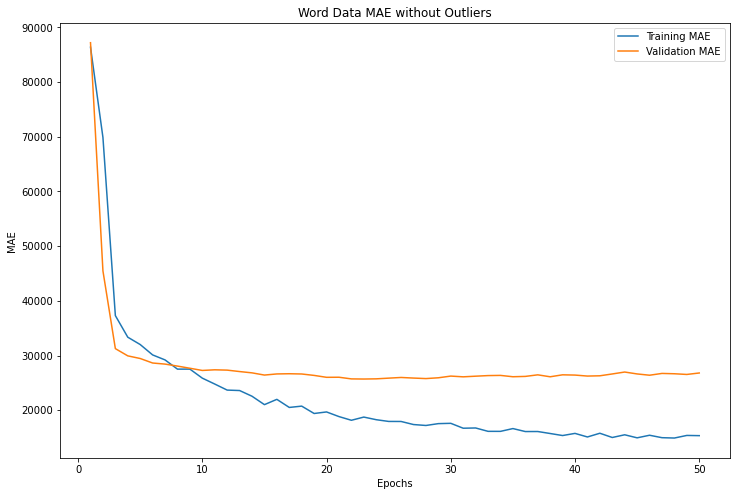

In [31]:
# Plotting Loss
fig, ax = plt.subplots(figsize=(12, 8))

model_dict = history_mae_iqr.history

mae_values = model_dict['mae']
val_mae_values = model_dict['val_mae']

epochs = range(1, len(mae_values) + 1)
ax.plot(epochs, mae_values, label='Training MAE')
ax.plot(epochs, val_mae_values, label='Validation MAE')
plt.legend()
plt.title('Word Data MAE without Outliers')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

#### Best Results

In [32]:
best_mae_iqr = load_model(r'Data/model_mae_iqr.h5')
errors(best_mae_iqr,mean_absolute_error,X_train_val_iqr,X_test_iqrf,
       y_train_val_iqr,y_test_iqrf,squared=False)

Train Error: 13748
Test Error: 29715


# Findings
- Loss on MAE produced the lowest error overall
- Removing outliers improved model performance

# Final Stats

In [33]:
y_test_preds = best_mae_iqr.predict(np.array(X_test_iqrf))
y_train_preds = best_mae_iqr.predict(np.array(X_train_val_iqr))

In [34]:
print("Average Views:",round(y_iqr.mean()[0]))
print("Train MAE:",round(mean_absolute_error(y_train_val_iqr,y_train_preds)))
print("Test MAE:",round(mean_absolute_error(y_test_iqrf,y_test_preds)))

Average Views: 107615
Train MAE: 13748
Test MAE: 29715


# Exporting MAE Model without Outliers

In [35]:
best_mae_iqr.save(r'Data\model.h5')
best_mae_iqr.save_weights(r'Data\model_weights.h5')